### Random Forest with 25 features

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix

In [33]:
# Read the dataset
data = pd.read_csv("./data_top25_dfeatures.csv")
data.shape

(99340, 26)

In [34]:
data.head()

,num_lab_procedures,num_medications,time_in_hospital,age,num_procedures,number_diagnoses,service_utilization,number_inpatient,admission_source_id,gender,...,diag_2_circulatory,medical_specialty_Missing,race_Caucasian,diag_1_circulatory,number_emergency,diag_3_neoplasms,medical_specialty_InternalMedicine,diag_2_neoplasms,diag_3_diabetes,readmitted
0,-0.097257,-1.850433,-1.138455,5,-0.783548,-3.298205,-0.774135,-0.635213,-1.431088,0,...,0,0,1,0,-0.323034,0,0,0,0,0
1,0.820652,0.249657,-0.464686,15,-0.783548,0.823423,-0.774135,-0.635213,0.648827,0,...,0,1,1,0,-0.323034,1,0,0,0,0
2,-1.627106,-0.368016,-0.801570,25,2.152858,-0.722187,1.319347,0.724104,0.648827,0,...,0,1,0,0,-0.323034,0,0,0,0,0
3,0.055727,0.002588,-0.801570,35,-0.196267,-0.206984,-0.774135,-0.635213,0.648827,1,...,0,1,1,0,-0.323034,0,0,0,0,0
4,0.412692,-0.985690,-1.138455,45,-0.783548,-1.237391,-0.774135,-0.635213,0.648827,1,...,0,1,1,0,-0.323034,0,0,1,1,0


In [35]:
# SMOTE balancing technique is applied
from imblearn.over_sampling import SMOTE
# Importing test_train_split from sklearn library
from sklearn.model_selection import train_test_split

# get the predictors and target variable from dataset
X = data.drop('readmitted', axis=1)
y = data['readmitted']


# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101, stratify=y)


In [36]:
y_train.value_counts()

0    70421
1     9051
Name: readmitted, dtype: int64

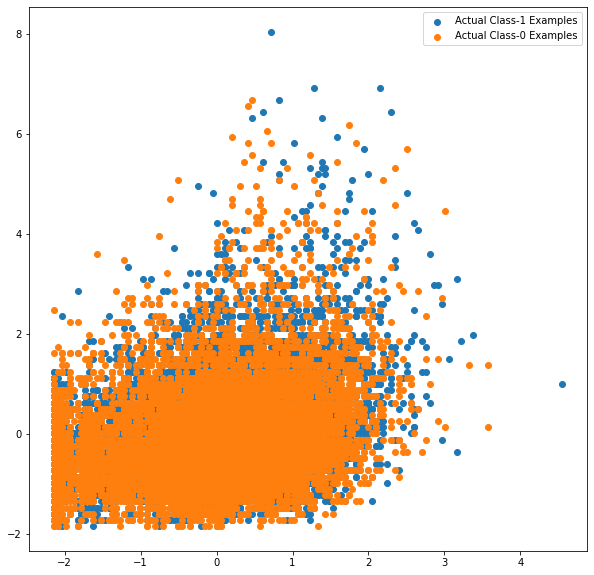

In [37]:
from collections import Counter
import numpy as np

X_train_1 = X_train.to_numpy()[np.where(y_train==1)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0)]

plt.rcParams['figure.figsize'] = [10, 10]
fig = plt.figure()
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [38]:
# Use SMOTE to balance the data
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [39]:
y_train.value_counts()

1    70421
0    70421
Name: readmitted, dtype: int64

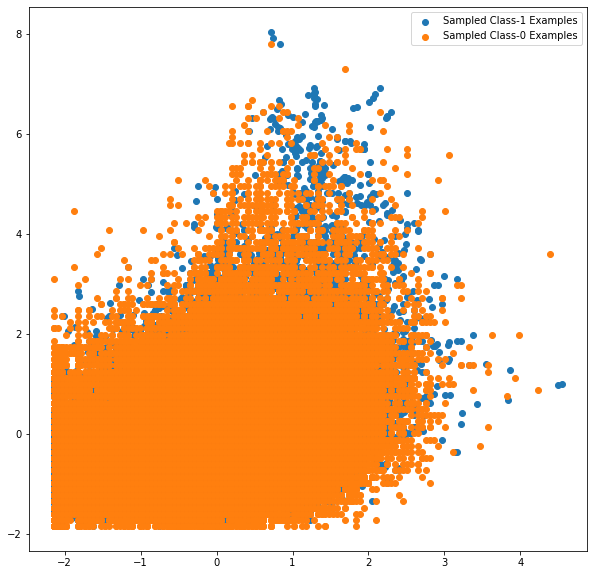

In [40]:
from collections import Counter
import numpy as np

X_train_1 = X_train.to_numpy()[np.where(y_train==1)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0)]

plt.rcParams['figure.figsize'] = [10, 10]
fig = plt.figure()
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Sampled Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Sampled Class-0 Examples')
plt.legend()

In [42]:
# Random Forest

# Let's first fit a random forest model with default hyperparameters.
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [6]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [7]:
# fit the model
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [9]:
# save the model to disk
import pickle
filename = 'rfc_25_dfeatures.sav'
pickle.dump(rfc, open(filename, 'wb'))

In [ ]:
# predict
predictions = rfc.predict(X_test)

In [11]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[17347   258]
 [ 2164    99]]


In [12]:
print(accuracy_score(y_test,predictions))

0.8780954298369237


In [67]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     17605
           1       0.30      0.05      0.08      2263

    accuracy                           0.88     19868
   macro avg       0.60      0.52      0.51     19868
weighted avg       0.82      0.88      0.84     19868



In [43]:
from sklearn.model_selection import RandomizedSearchCV

In [44]:
# specify number of folds
n_folds = 5

# parameters to build the model on
param_grid = {'max_features': [4, 8, 14, 20],
             'n_estimators': range(100, 1500, 400),
             'max_depth': range(2, 20, 5),
             'min_samples_leaf': range(100, 400, 50),
             'min_samples_split': range(200, 500, 50),
             }
# instantiate the model 
rf = RandomForestClassifier()


# fit tree on training data
rf = RandomizedSearchCV(rf, param_grid, 
                  cv=n_folds, 
                  scoring="accuracy",
                  return_train_score=True,
                  n_jobs = -1,verbose = 1)
rf.fit(X_train, y_train)

best_parameters = rf.best_params_
print(best_parameters)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 1300, 'min_samples_split': 400, 'min_samples_leaf': 200, 'max_features': 20, 'max_depth': 12}


In [45]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,params,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,106.331117,0.657845,3.638859,0.063354,1300,450,100,4,2,"{'n_estimators': 1300, 'min_samples_split': 45...",...,0.707701,0.036375,9,0.730361,0.706238,0.704031,0.706410,0.700437,0.709495,0.010653
1,572.600511,6.881490,4.137369,0.116842,900,300,300,20,7,"{'n_estimators': 900, 'min_samples_split': 300...",...,0.788146,0.076687,7,0.812768,0.779592,0.776772,0.785523,0.787307,0.788392,0.012775
2,963.004770,6.979360,5.599574,0.299370,1300,400,200,20,12,"{'n_estimators': 1300, 'min_samples_split': 40...",...,0.835050,0.091297,1,0.873821,0.832214,0.825683,0.827698,0.828860,0.837655,0.018207
3,164.960399,1.484225,3.753823,0.094474,1300,350,350,8,2,"{'n_estimators': 1300, 'min_samples_split': 35...",...,0.685158,0.026968,10,0.702715,0.685754,0.679962,0.679119,0.685393,0.686589,0.008508
4,299.929413,5.383325,2.907830,0.078802,500,300,350,14,17,"{'n_estimators': 500, 'min_samples_split': 300...",...,0.824691,0.084991,2,0.867670,0.817774,0.818095,0.817704,0.821148,0.828478,0.019638


In [46]:
# Get the best parameters
best_parameters = rf.best_params_
print(best_parameters)

{'n_estimators': 1300, 'min_samples_split': 400, 'min_samples_leaf': 200, 'max_features': 20, 'max_depth': 12}


In [47]:
# Build the Random Forest with the best_parameters
rf_best = RandomForestClassifier(n_estimators=best_parameters['n_estimators'],
                                 min_samples_split=best_parameters['min_samples_split'],
                                 min_samples_leaf=best_parameters['min_samples_leaf'],
                                 max_features=best_parameters['max_features'],
                                 max_depth=best_parameters['max_depth'],
                                 criterion='gini')
# fit the model
rf_best.fit(X_train, y_train)

# predict
best_predictions = rf_best.predict(X_test)

In [15]:
# save the model to disk
import pickle
filename = 'rfc_25_best_dfeatures.sav'
pickle.dump(rf, open(filename, 'wb'))

In [68]:
# validate the model using kfold cross validation
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics

y_train_skf = y_train.values
X_train_skf = X_train.values
train_score = []
test_score = []
splits=5
folds=range(1,splits+1)
val_auc_score = 0.0
val_accracy_score = 0.0
skf = StratifiedKFold(n_splits=splits, shuffle=True)
for train_index, test_index in skf.split(X_train_skf, y_train_skf):
    X_train_cv, y_train_cv = X_train_skf[train_index], y_train_skf[train_index]
    X_test_cv, y_test_cv = X_train_skf[test_index], y_train_skf[test_index]
    rf_val = RandomForestClassifier(n_estimators=best_parameters['n_estimators'],
                                 min_samples_split=best_parameters['min_samples_split'],
                                 min_samples_leaf=best_parameters['min_samples_leaf'],
                                 max_features=best_parameters['max_features'],
                                 max_depth=best_parameters['max_depth'],
                                 criterion='gini')
    rf_val.fit(X_train_cv,y_train_cv)
    y_test_cv_predict = rf_val.predict(X_test_cv)
    val_auc_score += metrics.roc_auc_score(y_test_cv, y_test_cv_predict)
    val_accracy_score += metrics.accuracy_score(y_test_cv, y_test_cv_predict)
    train_score.append(rf_val.score(X_train_cv,y_train_cv))
    test_score.append(rf_val.score(X_test_cv,y_test_cv))

print("Validation AUC Accuracy= ", val_auc_score/splits)
print("Validation Accuracy= ", val_accracy_score/splits) 
plt.plot(folds,train_score,label= 'Accuracy on training set')
plt.plot(folds,test_score,label= 'Accuracy on validation set')
plt.xlabel('K fold RandomForest')
plt.ylabel('Accuracy')
plt.legend()

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [74]:
# evaluation metrics
print(classification_report(y_test,best_predictions))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93     17605
           1       0.29      0.10      0.15      2263

    accuracy                           0.87     19868
   macro avg       0.59      0.53      0.54     19868
weighted avg       0.82      0.87      0.84     19868



In [75]:
# Let's check the overall accuracy over the test dataset
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
print("Accuracy_score: ", metrics.accuracy_score(y_test, best_predictions))

print("AUC_accu =", metrics.roc_auc_score(y_test, best_predictions ))
print("Precision_score = ",precision_score(y_test, best_predictions))
print("recall_score = ",recall_score(y_test, best_predictions))
print('ROC AUC = ', roc_auc_score(y_test, best_predictions))
# confusion matrix
matrix = confusion_matrix(y_test, best_predictions)
print("Confusion matrix = ", matrix)

Accuracy_score:  0.8694382927320314
AUC_accu = 0.533729257558619
Precision_score =  0.28754813863928114
recall_score =  0.09898365002209457


<AxesSubplot:>

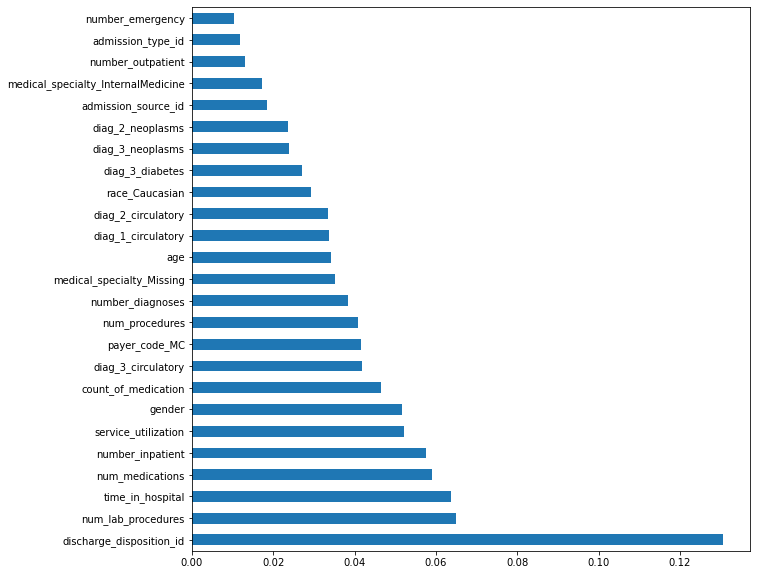

In [13]:
# get the predictors and target variable from dataset
X = data.drop('readmitted', axis=1)
y = data['readmitted']
# plot feature importance
features = pd.Series(rf_best.feature_importances_, index=X.columns)
plt.figure(figsize=(10,10))

features.nlargest(25).plot(kind='barh')


# Look at the important features contributing towards prediction

In [136]:
# XGBoost feature selection
import xgboost
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [138]:
predictions = classifier.predict(X_test)

In [142]:
# Let's check the overall accuracy over the test dataset
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
print("Accuracy_score: ", metrics.accuracy_score(y_test, predictions))

print("AUC_accu =", metrics.roc_auc_score(y_test, predictions ))
print("Precision_score = ",precision_score(y_test, predictions))
print("recall_score = ",recall_score(y_test, predictions))

print("confusion metrix: \n", confusion_matrix(y_test, predictions))


Accuracy_score:  0.8847896114354741
AUC_accu = 0.5061931799142648
Precision_score =  0.3673469387755102
recall_score =  0.015908086610693768
confusion metrix: 
 [[17543    62]
 [ 2227    36]]


In [143]:
print('\nClassification Report\n')
print(classification_report(y_test, predictions))



Classification Report

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     17605
           1       0.37      0.02      0.03      2263

    accuracy                           0.88     19868
   macro avg       0.63      0.51      0.48     19868
weighted avg       0.83      0.88      0.84     19868



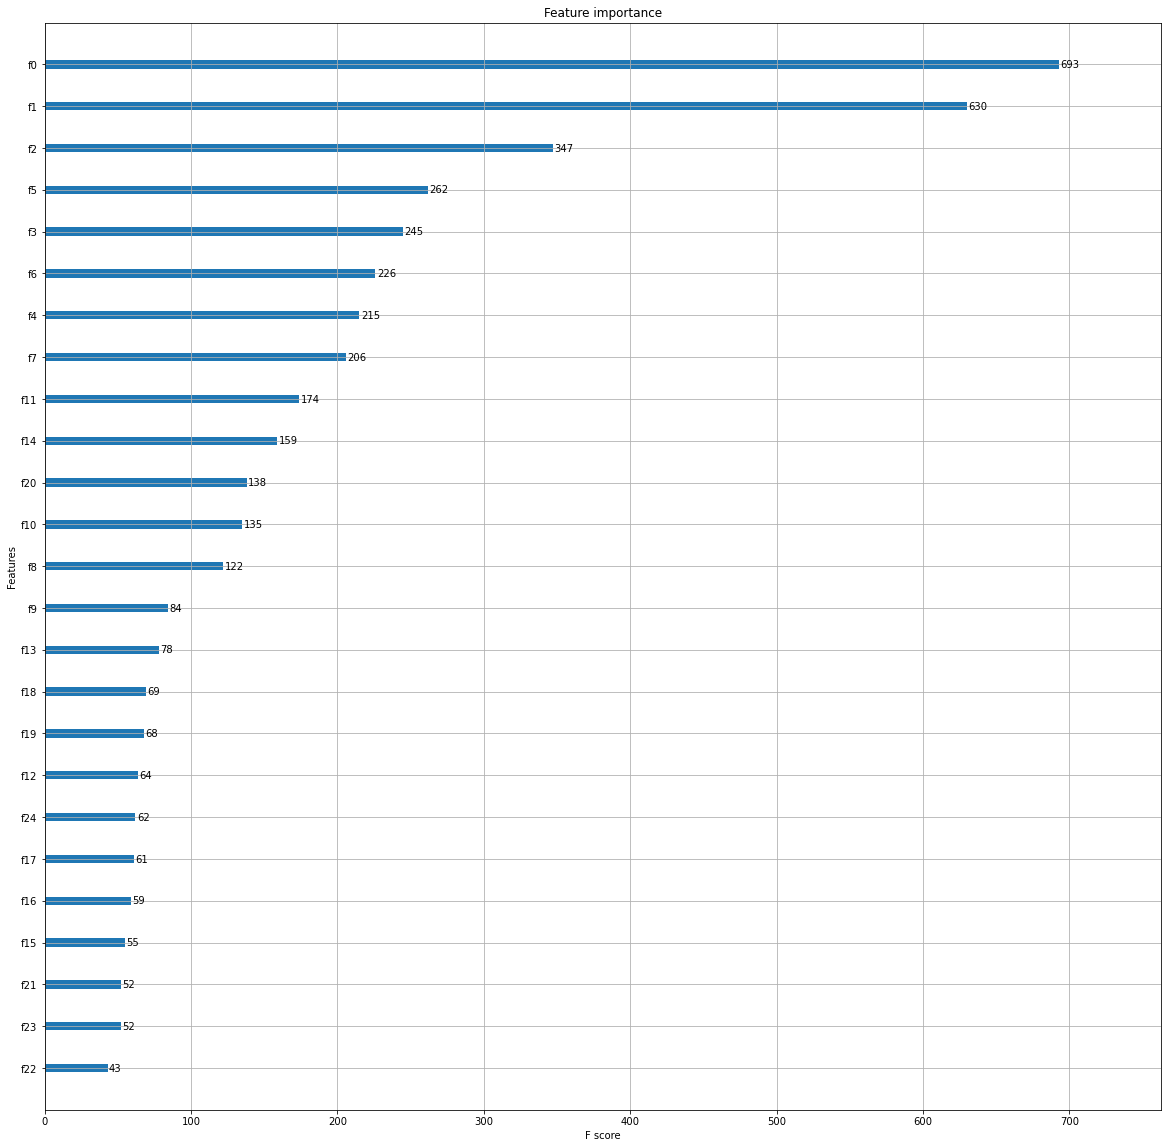

In [144]:
ax = xgboost.plot_importance(classifier)
fig = ax.figure
fig.set_size_inches(20, 20)

<AxesSubplot:>

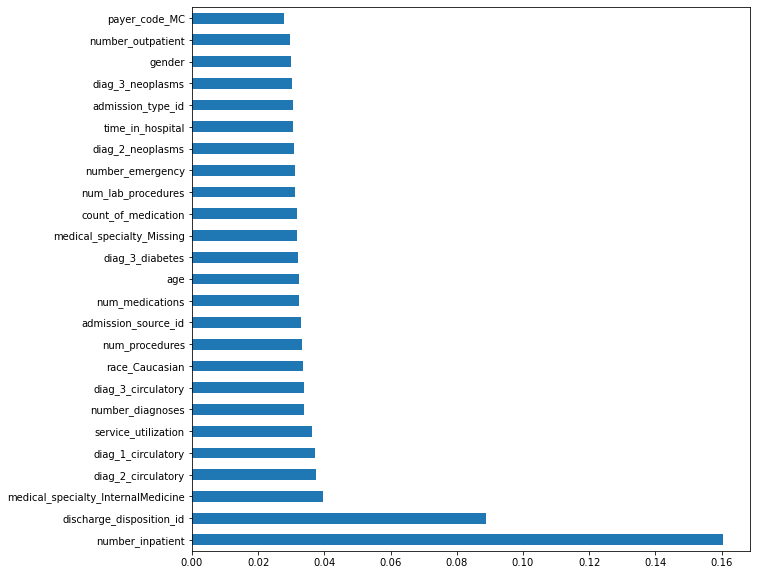

In [151]:
# plot feature importance
features = pd.Series(classifier.feature_importances_, index=X.columns)
plt.figure(figsize=(10,10))

features.nlargest(25).plot(kind='barh')


### Permutation Based feature importance

In [158]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(classifier, X_test, y_test)

Text(0.5, 0, 'Permutation Importance')

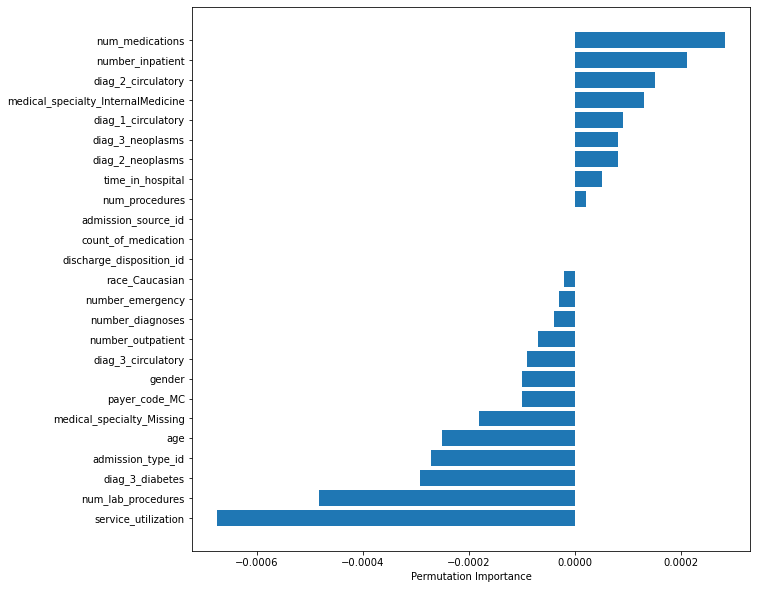

In [162]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10,10))
plt.barh(data.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")